In [5]:
def sqrt(x):

    z0 = x / 2.0

    # Threshold
    threshold = 0.01

 
    while True:
        # Newton's formula
        z1 = z0 - (z0 * z0 - x) / (2 * z0)

       
        if abs(z1 - z0) < threshold:
            break

        # Update the guess for the next iteration
        z0 = z1

    return z1

# Example Test
number = 25.0 
result = sqrt(number)
print(f"The square root of {number} is approximately {result}")


The square root of 25.0 is approximately 5.000000000016778


Task 2

In [6]:
import scipy.stats as stats

# Observed frequencies
observed = [[57, 45],
            [43, 56]]

chi2, p, _, _ = stats.chi2_contingency(observed)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")


Chi-squared value: 2.6359100836554257
P-value: 0.10447218120907394


Task 3

In [8]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the penguins dataset
URL = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins_df = pd.read_csv(URL)

# Filterfor Gentoo penguins
gentoo_df = penguins_df[penguins_df['species'] == 'Gentoo']

# Separation by Gender
male_body_mass = gentoo_df[gentoo_df['sex'] == 'MALE']['body_mass_g']
female_body_mass = gentoo_df[gentoo_df['sex'] == 'FEMALE']['body_mass_g']

# Perform t-test
t_stat, p_value = ttest_ind(male_body_mass, female_body_mass, equal_var=False)

# Print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("There is evidence of a significant difference in body mass between male and female Gentoo penguins.")
else:
    print("There is no significant difference in body mass between male and female Gentoo penguins.")


T-statistic: 14.761368414543291
P-value: 1.8677596749117468e-28
There is evidence of a significant difference in body mass between male and female Gentoo penguins.


Task 4

In [9]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load the iris dataset
iris = sns.load_dataset('iris')

# Prepare data
X = iris.drop('species', axis=1)
y = iris['species']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Task 5

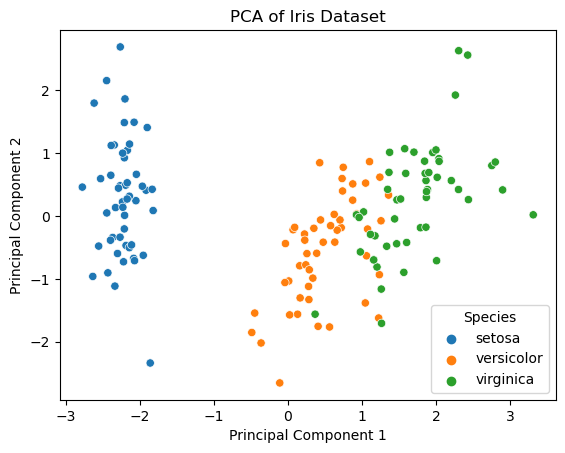

Explained Variance Ratio: [0.72962445 0.22850762]


In [10]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the iris dataset
iris = sns.load_dataset('iris')

# Separate features (X) and target variable (y)
X = iris.drop('species', axis=1)
y = iris['species']

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA with two components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Species'] = y

# Visualize the results
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Species', data=pca_df)
plt.title('PCA of Iris Dataset')
plt.show()

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")

The features are scaled using StandardScaler to make sure that each feature has an average of 0 and a standard deviation of 1. Following this, PCA is used to transform the scaled features into two principal components, namely Principal Component 1 and Principal Component 2. The outcomes are then presented in a scatter plot, where each point signifies an observation in a simplified two-dimensional space, and the color denotes the species.

Additionally, the explained variance ratio is shown, signifying the percentage of the dataset's variability captured by each principal component. In simpler terms, the scatter plot visually represents the iris dataset in a two-dimensional layout, with similar species likely forming clusters. The explained variance ratio helps gauge how much information each principal component retains from the original dataset. A higher ratio implies that the corresponding component holds more valuable data.

In conclusion, PCA proves valuable for reducing dimensions and aiding visualization. The scatter plot and explained variance ratio offer insights into the arrangement of observations in the simplified space and the significance of each principal component in retaining overall dataset variance.